In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os.path
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler

In [18]:
x_train_mca = pd.read_csv(os.path.join("proc_data", "x_train_mca.csv"))
# x_test_mca = pd.read_csv(os.path.join("proc_data", "x_test_mca.csv"))
y_train = pd.read_csv(os.path.join("proc_data", "y_train.csv"))
X_train, X_test, y_train, y_test = train_test_split(x_train_mca, y_train, test_size=0.33, random_state=42)

In [44]:
X_train.columns

Index(['farmaco_1', 'farmaco_10', 'farmaco_11', 'farmaco_12', 'farmaco_13',
       'farmaco_14', 'farmaco_15', 'farmaco_18', 'farmaco_19', 'farmaco_2',
       'farmaco_20', 'farmaco_21', 'farmaco_22', 'farmaco_23', 'farmaco_3',
       'farmaco_4', 'farmaco_5', 'farmaco_6', 'farmaco_7', 'farmaco_8',
       'farmaco_9', 'ordinal_1', 'ordinal_2', 'edad_integer', 'counter_1',
       'counter_2', 'counter_3', 'counter_4', 'counter_5', 'counter_6',
       'counter_7', 'Dim 1', 'Dim 2'],
      dtype='object')

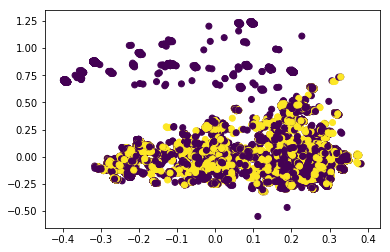

In [46]:
plt.scatter(X_train["Dim 1"], X_train["Dim 2"], c=y_train.Y)
plt.show()

In [31]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

/home/antortjim/anaconda3/envs/ML/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/antortjim/anaconda3/envs/ML/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/antortjim/anaconda3/envs/ML/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [35]:
pca = PCA(n_components=2, svd_solver='full')
pca.fit(X_train_scaled)
X_train_transform = pd.DataFrame(data=pca.transform(X_train_scaled), columns=["PC1","PC2"])
X_train_transform.head()

,PC1,PC2
0,-0.238754,-1.042998
1,-1.089765,0.398725
2,-0.647498,2.917090
3,-1.093241,-0.255266
4,1.716165,-0.121959


In [20]:
ridge = Ridge(alpha=1)
parameters = {"alpha": [0.25, 0.5, 1, 2, 3, 10]}
clf = GridSearchCV(estimator=ridge, param_grid=parameters, cv=5)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.25, 0.5, 1, 2, 3, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [22]:
y_predict=np.round(clf.predict(X_train))

In [23]:
clf.cv_results_["params"]

[{'alpha': 0.25},
 {'alpha': 0.5},
 {'alpha': 1},
 {'alpha': 2},
 {'alpha': 3},
 {'alpha': 10}]

In [47]:
clf.score(X_train, y_train) 

0.06617470390270697

In [25]:
accuracy_score(y_train, y_predict, normalize=True, sample_weight=None)

0.6157958420415796

In [48]:
y_predict = np.round(clf.predict(X_test))
accuracy_score(y_test, y_predict, normalize=True, sample_weight=None)

0.6076198133011746

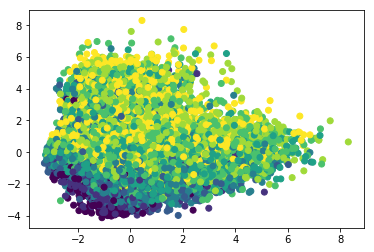

In [36]:
plt.scatter(x=X_train_transform["PC1"], y=X_train_transform["PC2"], c=X_train.edad_integer)
plt.show()

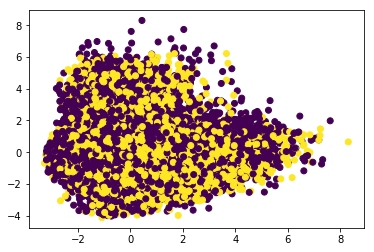

In [43]:
plt.scatter(x=X_train_transform["PC1"], y=X_train_transform["PC2"], c=y_train.Y)
plt.show()

In [64]:
learning_rates = [0.05, 0.1, 0.5, 1]

gb = GradientBoostingClassifier(random_state = 0)
param_grid = dict(n_estimators = [10,50,100], learning_rate = learning_rates, max_features=[1,5,10], max_depth = [1,5,10])
clf = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, verbose=True,n_jobs=2)
clf.fit(X_train_scaled, y_train.values.reshape((-1,)))

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   14.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  3.7min
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed: 10.2min
[Parallel(n_jobs=2)]: Done 540 out of 540 | elapsed: 13.6min finished


NameError: name 'cf' is not defined

In [69]:
y_predict=np.round(clf.predict(X_train_scaled))
print("Accuracy score (training): {0:.3f}".format(accuracy_score(y_train, y_predict, normalize=True, sample_weight=None)))
print("AUC score (training): {0:.3f}".format(roc_auc_score(y_train, y_predict)))
y_predict=np.round(clf.predict(X_test_scaled))
print("Accuracy score (test): {0:.3f}".format(accuracy_score(y_test, y_predict, normalize=True, sample_weight=None)))
print("AUC score (test): {0:.3f}".format(roc_auc_score(y_test, y_predict)))
# print("Learning rate: ", learning_rate)
# print("Accuracy score (training): {0:.3f}".format(gb.score(X_train_scaled, y_train)))
# print("Accuracy score (validation): {0:.3f}".format(gb.score(X_test_scaled, y_test)))

Accuracy score (training): 0.658
AUC score (training): 0.647
Accuracy score (test): 0.637
AUC score (test): 0.627
